In [1]:
import cellrank
import scvelo as scv
import os
os.chdir("/home/yakov/face_data")
path = os.getcwd()
print(path)
import platform
print(platform.python_version())

/home/yakov/face_data
3.8.16


In [2]:
import seaborn as sns
import pandas as pd
import random
import numpy as np
import loompy as lp
import scanpy as scp
import scvelo as scv
import matplotlib.pyplot as plt
import scanpy.external as sce
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
random.seed(101)
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
scp.set_figure_params(scanpy=True, fontsize=14 )

/home/yakov/miniconda3/envs/scFates/lib/python3.8/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yakov/miniconda3/envs/scFates/lib/python3.8/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yakov/miniconda3/envs/scFates/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Detected doublet rate = 4.8%
Estimated detectable doublet fraction = 43.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 11.1%


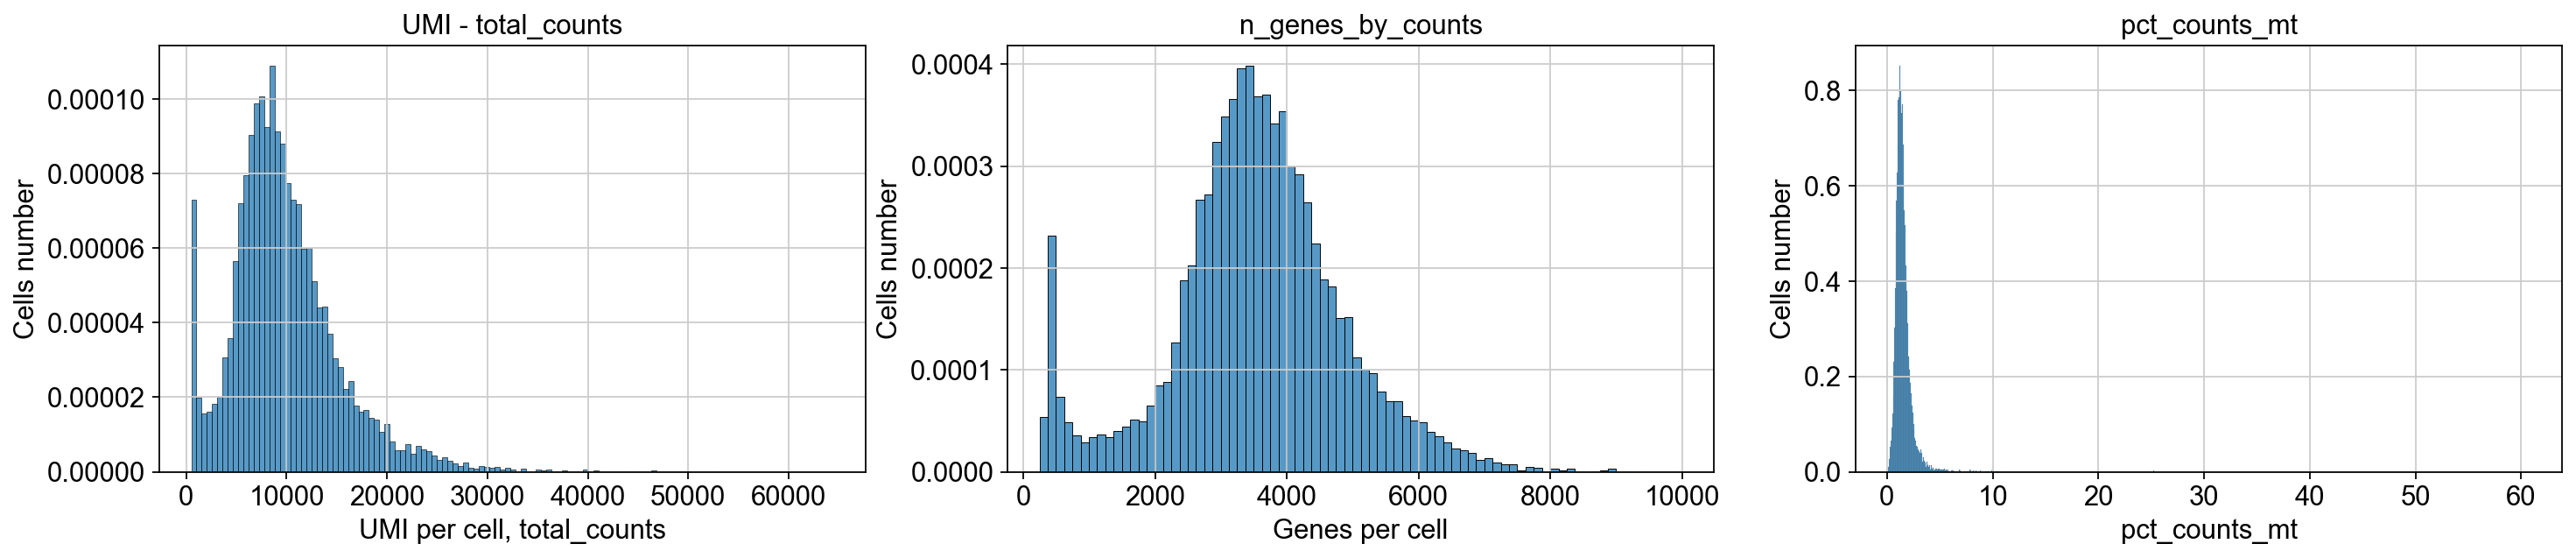

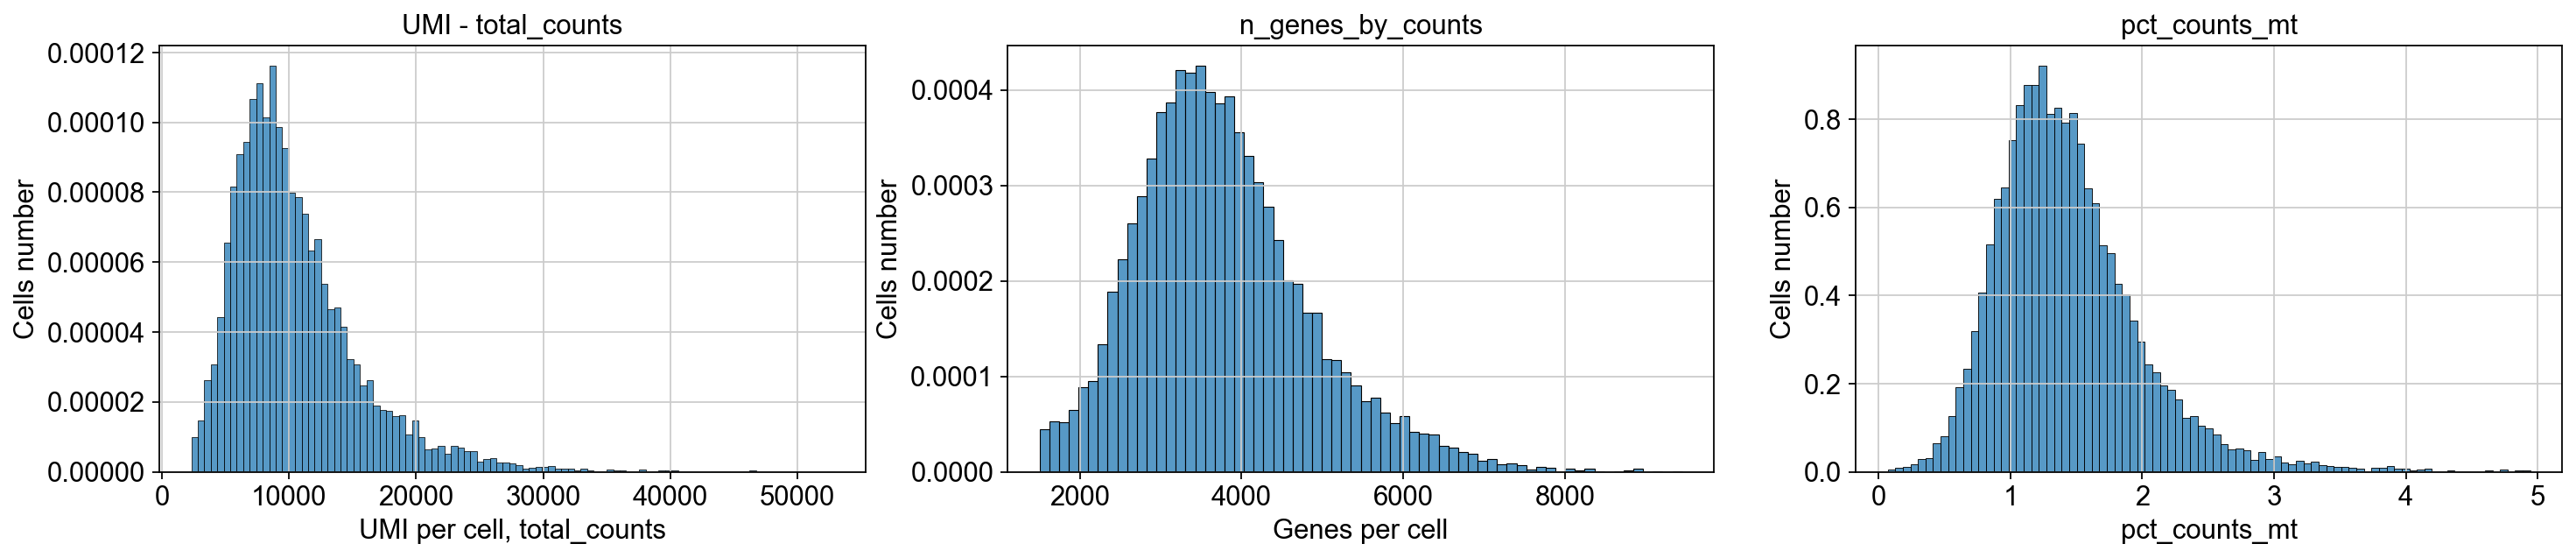

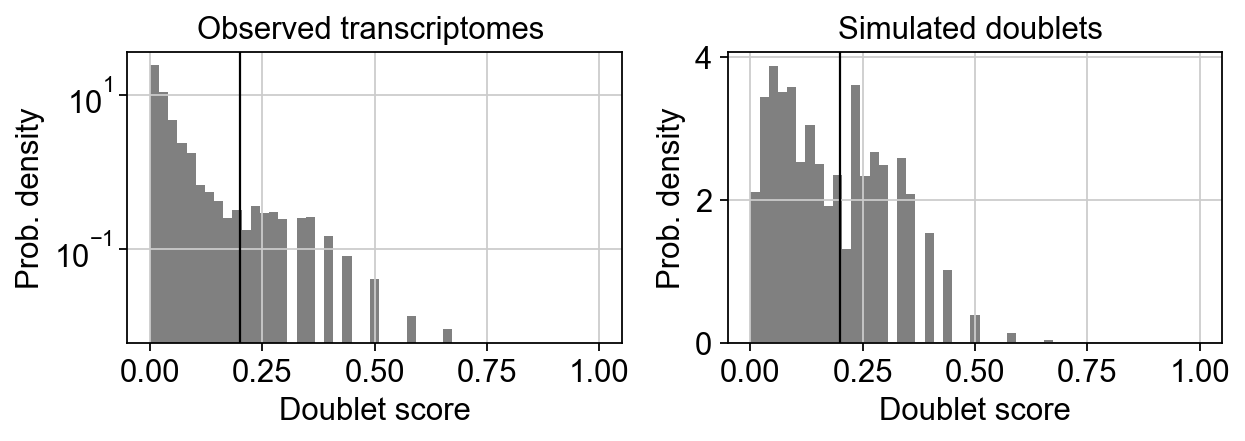

518


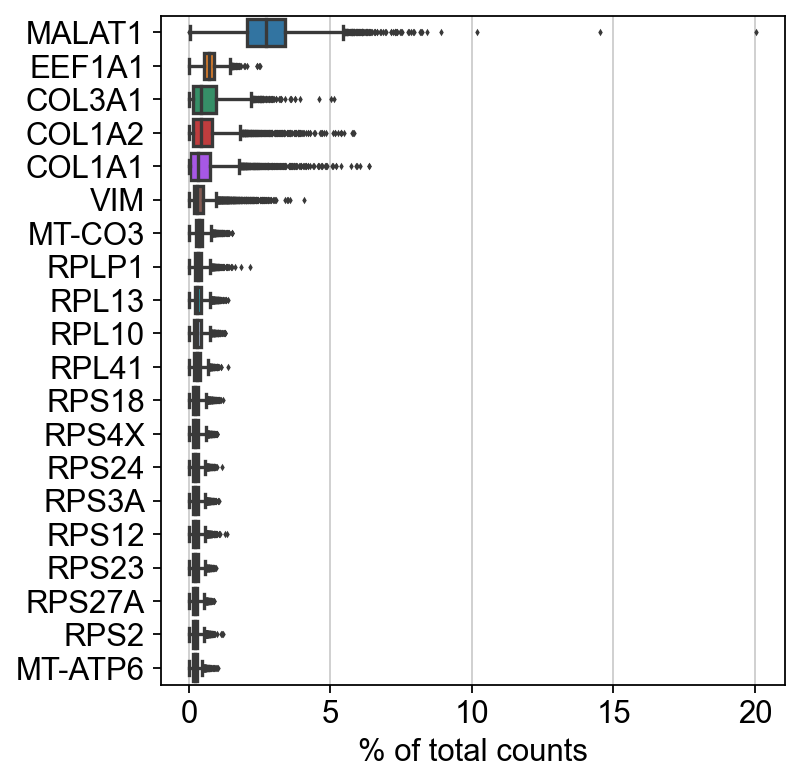

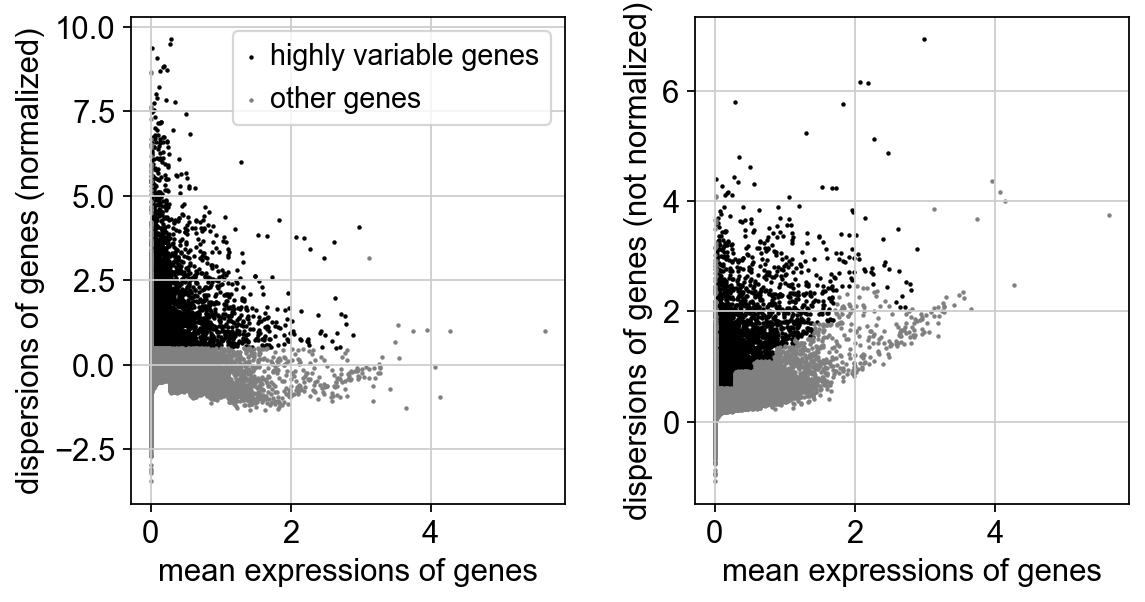

/home/yakov/miniconda3/envs/scFates/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


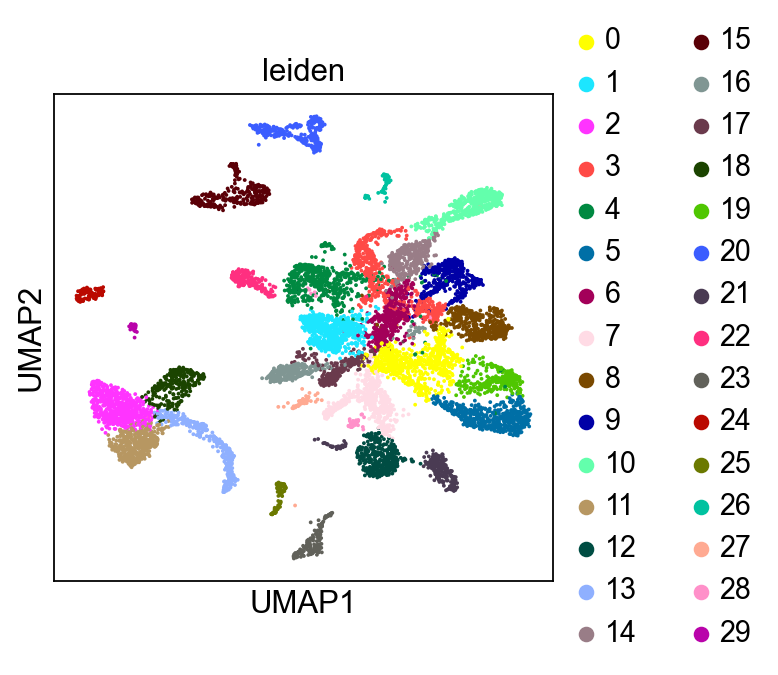

In [4]:
file = 'jaw_11'
adata = scp.read_10x_h5('DATA/' + file +'.h5')

adata.var_names_make_unique()
adata.obs_names_make_unique
scp.pp.filter_cells(adata, min_genes=200)
scp.pp.filter_genes(adata, min_cells=3)
    
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
scp.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(22, 4)) # Создаём сетку, чтобы отрисовать три графика

# Отрисовываем распределение числа генов по клеткам
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, ax=axs[1], stat="density")
axs[1].set_xlabel("Genes per cell")
axs[1].set_ylabel("Cells number")
axs[1].set_title("n_genes_by_counts")

    # Отрисовываем распределение общего числа UMI
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0], stat="density")
axs[0].set_xlabel("UMI per cell, total_counts")
axs[0].set_ylabel("Cells number")
axs[0].set_title("UMI - total_counts")


    # Отрисовываем распределение митохондриальной экспрессии
sns.histplot(adata.obs["pct_counts_mt"], kde=False, ax=axs[2], stat="density")
axs[2].set_xlabel("pct_counts_mt")
axs[2].set_ylabel("Cells number")
axs[2].set_title("pct_counts_mt")

# annotate the group of mitochondrial genes as "mt"
#adata.var["mt"] = adata.var_names.str.startswith("MT-")
#scp.pp.calculate_qc_metrics(
#    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
#)
#scp.pl.violin(
#    adata,
#    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
#    jitter=0.4,
#    multi_panel=True,
#)

#scp.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
#scp.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")
adata = adata[adata.obs.n_genes_by_counts < 10000, :].copy()
adata = adata[adata.obs.n_genes_by_counts > 1500, :].copy()
adata = adata[adata.obs.pct_counts_mt < 5, :].copy()

#scp.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
#scp.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
scp.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(22, 4)) # Создаём сетку, чтобы отрисовать три графика

# Отрисовываем распределение числа генов по клеткам
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, ax=axs[1], stat="density")
axs[1].set_xlabel("Genes per cell")
axs[1].set_ylabel("Cells number")
axs[1].set_title("n_genes_by_counts")

    # Отрисовываем распределение общего числа UMI
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0], stat="density")
axs[0].set_xlabel("UMI per cell, total_counts")
axs[0].set_ylabel("Cells number")
axs[0].set_title("UMI - total_counts")


    # Отрисовываем распределение митохондриальной экспрессии
sns.histplot(adata.obs["pct_counts_mt"], kde=False, ax=axs[2], stat="density")
axs[2].set_xlabel("pct_counts_mt")
axs[2].set_ylabel("Cells number")
axs[2].set_title("pct_counts_mt")

scp.external.pp.scrublet(adata, threshold = 0.2 )
scp.external.pl.scrublet_score_distribution(adata)
all_cells = [x for x in adata.obs_names]
cells_to_remove = adata.obs.loc[adata.obs.predicted_doublet].index.to_list()
print(len( cells_to_remove ))
for cell in cells_to_remove:
    all_cells.remove(cell)
adata = adata[all_cells, :].copy()

for col in adata.var:
    del adata.var[col]
    
all_genes = [x for x in adata.var_names]
for gene in ['XIST', 'AD16','AIC','APOO','ARMCX6','BEX1','BEX2','BEX4','CCDC120','CCDC22','CD99L2','CDR1-AS','CHRDL1','CMTX2','CMTX3','CT45A5','CT55','CXorf36','CXorf57','CXorf40A','CXorf49','CXorf66','CXorf67','DACH2','EFHC2','ERCC6L','F8A1','FAM104B','FAM120C','FAM122B','FAM122C','FAM127A','FAM50A','FATE1','FMR1-AS1','FRMPD3','FRMPD4','FUNDC1','FUNDC2','GAGE12F','GAGE2A','GATA1','GNL3L','GPRASP2','GRIPAP1','GRDX','HDHD1A','HS6ST2','ITM2A','LAS1L','LINC01420','LOC101059915','MAGEA2','MAGEA5','MAGEA8','MAGED4B','MAGT1','MAGED4','MAP3K15','MBNL3','MBTPS2','MCT-1','MIR106A','MIR222','MIR361','MIR503','MIR6087','MIR660','MIRLET7F2','MORF4L2','MOSPD1','MOSPD2','NAP1L3','NKRF','NRK','OTUD5','PASD1','PAGE1','PAGE2B','PBDC1','PCYT1B','PIN4','PLAC1','PLP2','RPA4','RPS6KA6','RRAGB','RTL3','SFRS17A','SLC38A5','SLITRK2','SMARCA1','SMS','SPANXN1','SPANXN5','SPG16','SSR4','TAF7L','TCEAL1','TCEAL4','TENT5D','TEX11','THOC2','TMEM29','TMEM47','TMLHE','TRAPPC2P1','TREX2','TRO','TSPYL2','TTC3P1','USP51','VSIG1','YIPF6','ZC3H12B','ZCCHC18','ZFP92','ZMYM3','ZNF157','ZNF182','ZNF275','ZNF674', 'SRY','ZFY','RPS4Y1','AMELY','TBL1Y','PCDH11Y','TGIF2LY','TSPY1','AZFa','USP9Y','DDX3Y','UTY','TB4Y','AZFb','CYorf15','RPS4Y2','EIF1AY','KDM5D','XKRY','HSFY1','PRY','RBMY1A1','AZFc','DAZ1','CDY1','VCY1']:
    if gene in all_genes:    
        all_genes.remove(gene)
adata = adata[:, all_genes].copy()

#cell_cycle_genes = pd.read_csv('../cell_cycle_genes/all_human_genes.csv')
#s_genes = cell_cycle_genes.all_genes[:43]
#g2m_genes = cell_cycle_genes.all_genes[43:]
#cell_cycle_genes = [x for x in cell_cycle_genes.all_genes if x in adata.var_names]
#scp.pp.filter_cells(adata, min_genes=200)
#scp.pp.filter_genes(adata, min_cells=3)
#scp.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
#scp.pp.log1p(adata)
#scp.pp.scale(adata)
#scp.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)
#adata_cc_genes = adata[:, cell_cycle_genes]
#scp.tl.pca(adata_cc_genes)
#scp.pl.pca_scatter(adata_cc_genes, color='phase')
#scp.pp.regress_out(adata, ['S_score', 'G2M_score'])
#scp.pp.scale(adata)
#adata_cc_genes = adata[:, cell_cycle_genes]
#scp.tl.pca(adata_cc_genes)
#scp.pl.pca_scatter(adata_cc_genes, color='phase')
adata.write('DATA/' + file +'.h5ad')

scp.pl.highest_expr_genes(adata, n_top=20)
scp.pp.normalize_total(adata, target_sum=1e4)
scp.pp.log1p(adata)

scp.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
scp.pl.highly_variable_genes(adata)
adata = adata[:, adata.var.highly_variable]
scp.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])
scp.pp.scale(adata, max_value=10)
adata.raw=adata
scp.tl.pca(adata,n_comps = 50, svd_solver='arpack',use_highly_variable=True)
scp.pp.neighbors(adata, n_neighbors = 25, n_pcs = 40)
#scp.tl.leiden(adata, resolution = 0.1)
scp.tl.leiden(adata)
scp.tl.umap(adata,n_components = 2)
scp.pl.umap(adata, color=['leiden'], save = ' Leiden ' + file + '.jpg')